# Introduction

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

In [2]:
data = pd.read_csv('Ecommerce Customers.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Data is customer from an ecommerce company. I want to create a model that can predict the yearly amount spent of customers based on features given from this data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


No NaN Value in data

In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


* Avg. Session Length is in minutes
* Time on App is in minutes. Less compared to website.
* Time on Website is in minutes
* Length of Membership is in years
* Yearly Amount Spend is in USD

# Explore and Analysis

## Average Session Length

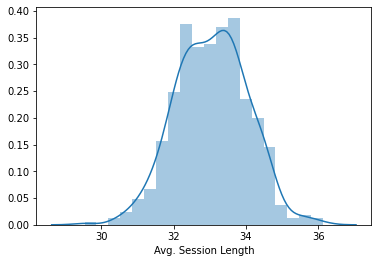

In [7]:
sns.distplot(data["Avg. Session Length"])

Most customers time spend in one session is in range of 30 to 36 minutes. Average Session Length is normally distributed.

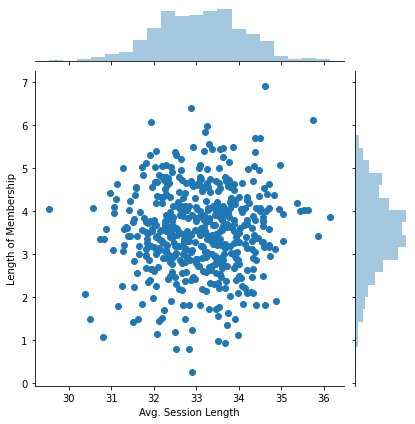

In [8]:
sns.jointplot(data = data, x = "Avg. Session Length", y = "Length of Membership")

I think the average session length didn't really affect the length of membership and vice versa

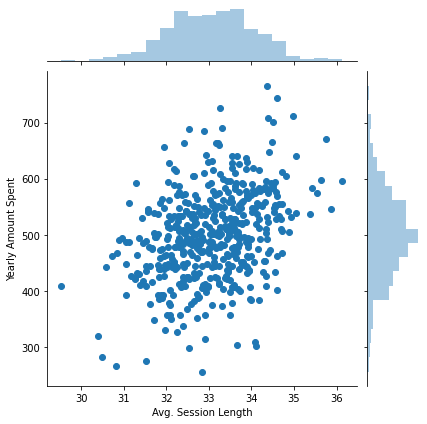

In [10]:
sns.jointplot(data = data, x = "Avg. Session Length", y = "Yearly Amount Spent")

The average session lenght didn't really affect the yearly amount spend and vice versa.

## Time on App

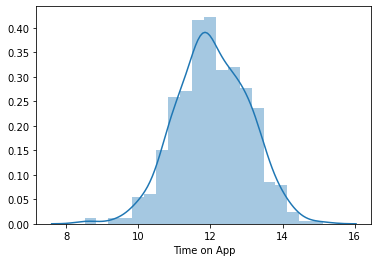

In [11]:
sns.distplot(data["Time on App"])

Time on App is in range of 8 to 16 minutes. Time on app is normally distributed.

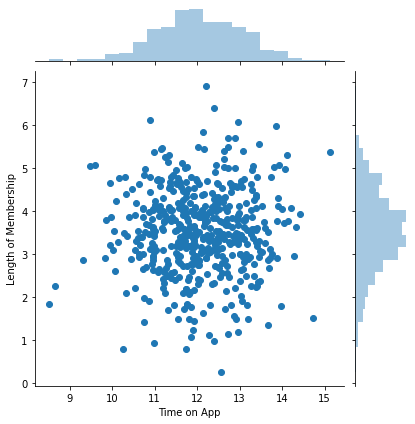

In [13]:
sns.jointplot(data = data, x = "Time on App", y = "Length of Membership")

The time on app didn't really affect the length of membership and vice versa.

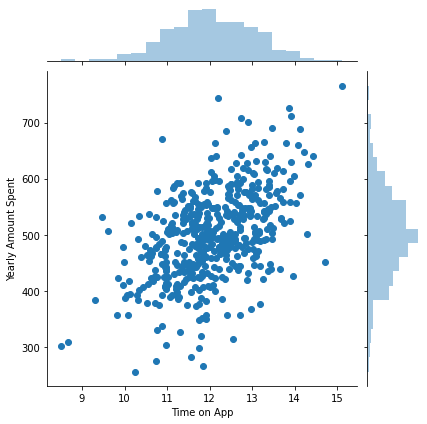

In [14]:
sns.jointplot(data = data, x = "Time on App", y = "Yearly Amount Spent")

The time on app didn't really affect the yearly amount spend and vice versa.

## Time on Website

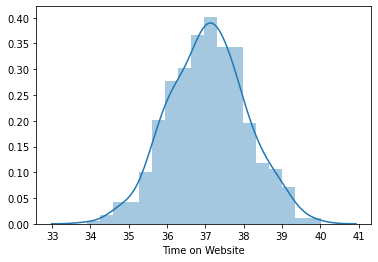

In [15]:
sns.distplot(data["Time on Website"])

Time on website is in range of 34 to 40 minutes. Time on website is normally distributed.

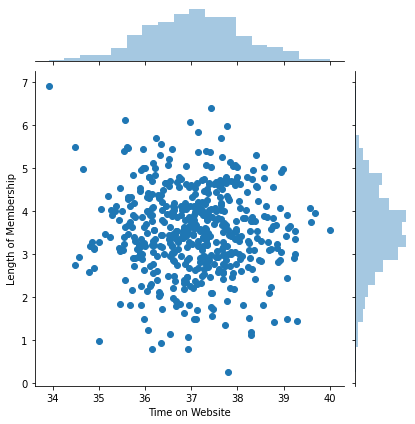

In [16]:
sns.jointplot(data = data, x = "Time on Website", y = "Length of Membership")

The time on website didn't really affect the length of membership and vice versa.

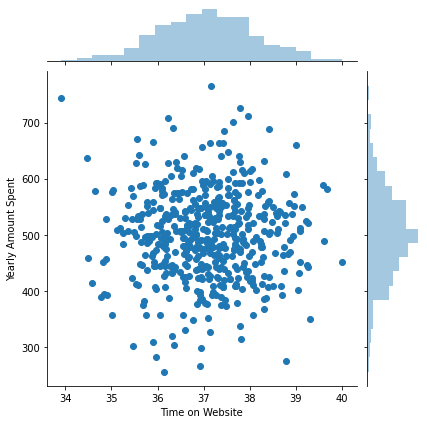

In [17]:
sns.jointplot(data = data, x = "Time on Website", y = "Yearly Amount Spent")

The time on website didn't really affect the yearly amount spend and vice versa.

## Length of Membership

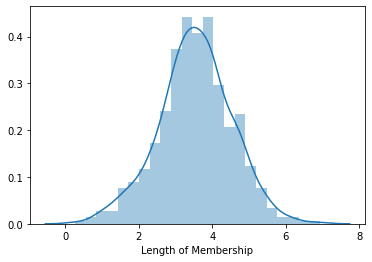

In [18]:
sns.distplot(data["Length of Membership"])

Length of Membership is in range of 0 to 8 years. Length is normally distributed.

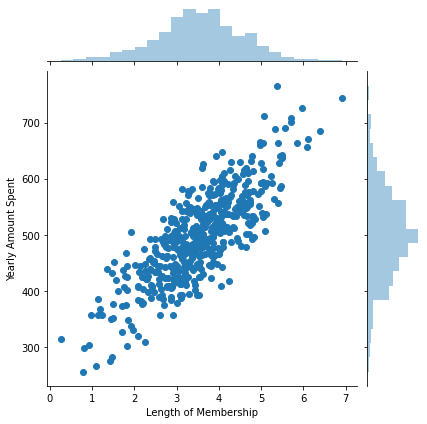

In [19]:
sns.jointplot(data = data, x = "Length of Membership", y = "Yearly Amount Spent")

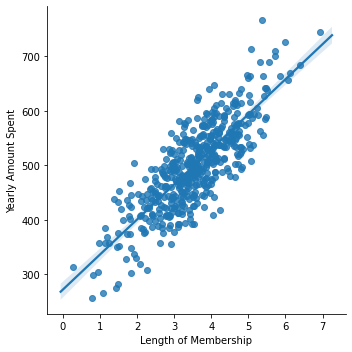

In [20]:
sns.lmplot(data = data, x= "Length of Membership", y ="Yearly Amount Spent")

It seems that the longer the membership, more yearly spent for customers.

# Linear Regression Model

In [24]:
X = data[["Avg. Session Length", "Time on App","Time on Website", "Length of Membership"]]
y = data["Yearly Amount Spent"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lm.intercept_)

-1047.9327822502385


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of \$25.98 ** in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of \$38.59 ** in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of \$0.19 ** in yearly amount spent.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of \$61.28 ** in yearly amount spent.

In [29]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

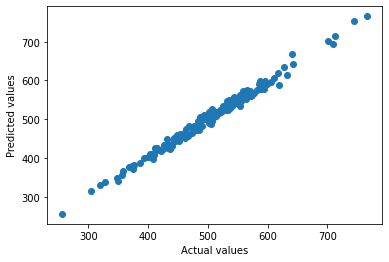

In [31]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

Looking at the plot graph, it seems that the linear regression model is performing well for this data.

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343082
MSE: 79.81305165097419
RMSE: 8.93381506697862


In [37]:
sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()

C:\Users\Nicholas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     4641.
Date:                 Fri, 17 Apr 2020   Prob (F-statistic):          1.88e-298
Time:                         14:46:30   Log-Likelihood:                -1314.1
No. Observations:                  350   AIC:                             2638.
Df Residuals:                      345   BIC:                             2658.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1047.9328     28.509    -36.758      0.000   -1104.007    -991.859
Avg. Session Length     25.9815      0.557     46.657      0.000      24.886      27.077
Time on App             38.5902      0.590     65.411      0.000      37.430      39.751
Time on Website          0.1904      0.576      0.330      0.741      -0.943       1.324
Length of Membership    61.2791      0.568    107.923      0.000      60.162      62.396
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.505
Skew:                          -0.092   Prob(JB):                        0.777
Kurtosis:                       2.977   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model itself is performing well by looking at the R squared value.

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <a list of 10 Patch objects>)

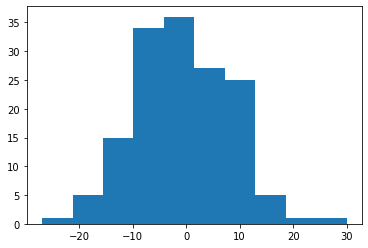

In [39]:
plt.hist((y_test-predictions))

In [40]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(result.resid)

{'Anderson': {15.0: 0.57,
  10.0: 0.649,
  5.0: 0.778,
  2.5: 0.908,
  1.0: 1.08,
  'stat': 0.2981737193135814},
 'Shapiro': 0.7023674845695496,
 'K^2': 0.7690906016843523}

The residual is normally distributed. This model can be used to predict yearly amount spent by customer.

# Conclusion

Increasing the amount of time per session from customers is a must especially for the time on app. I suggest improvement in UI/UX for the app. Also increasing the membership length of customers is a must. I suggest giving incentives for loyal long length members such as discounts can be done. Also giving discounts to customers that commit to long membership length can increase the amount of longer membership length.